# Avaliação de Score para Crédito de Cliente

Neste notebook, será abordado o problema de score de crédito de um cliente. Avaliar um score de crédito é de extrema importância, principalmente ao se falar de instituições que fornecem crédito aos clientes. Com a avaliação de score do cliente, a instituição pode ter uma noção do risco que determinado cliente pode oferecer. 

A partir do momento, que a instituição determina o nível de risco de cliente, algumas medidas poderão ser tomadas, como por exemplo, oferecer produtos com taxas de juros maiores para clientes com alto risco, ou oferecer maiores quantias para clientes com risco baixos, ou até mesmo negar crédito.

O objetivo deste projeto é classificar clientes como possíveis bons ou maus pagadores baseados em dados históricos de clientes antigos. Será usado um modelo de Machine Learning para fazer essa classificação. O modelo entregará uma probabilidade de cada cliente ser bom ou mau pagador, e após isso ainda farei uma classificação posterior por risco de crédito: baixo, alto e médio.

### Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Base de dados

A base de dados que será utilizada foi coletada de um banco da Alemanha, para realizar atividades de classificação usando Machine Learning para prever se os cliente seriam ou não bons pagadores. Dessa forma, pode ser avaliado o risco de oferecer crédito para determinados clientes. 

In [2]:
# Importando a base de dados
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Carregando a base de dados
dados = pd.read_csv(url, delimiter = ' ', header = None)  
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Preparação dos dados

Antes de realizar a análise exploratória dos dados, é necessário fazer transformações nos dados, pois os dados são fornecidos, com as colunas e linhas codificados. No mesmo local onde os dados são baixados, é disponibilizado um dicionário dos dados mostrando o que significa as colunas e as linhas.

In [3]:
# Lista com nome das colunas
nomes = ['conta', 'duração', 'historico', 'motivo', 'quantia', 
         'poupança', 'emprego', 'taxa', 'status', 'garantia', 
         'residencia', 'propriedades', 'idade', 'financiamentos', 'moradia', 
         'creditos', 'trabalho', 'dependentes', 'telefone', 'estrangeiro', 'pagador']

# Transformando o nome das colunas
dados.columns = nomes
dados.head()

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,...,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Da mesma maneira que fizemos com o nome das colunas, agora vamos fazer para cada observação.

In [4]:
# Pré-processamento inicial das variáveis
# Serão criados dicionários para mapear os novos valores

dic = {'A11': 'negativo', 'A12': '[0-200)', 'A13': '200+', 'A14': 'sem conta'}
dados['conta'] = dados['conta'].map(dic)


dic = {'A30': 'primeira vez', 'A31': 'creditos quitados', 'A32': 'pagamento em dia', 
       'A33': 'já atrasou pagamentos', 'A34': 'conta crítica'}
dados['historico'] = dados['historico'].map(dic)


dic = {'A40': 'carro novo', 'A41': 'carro usado', 'A42': 'móveis', 
       'A43': 'radio/televisão', 'A44': 'itens de casa', 'A45': 'reparos', 
       'A46': 'educação', 'A47': 'férias', 'A48': 'retreinamentos', 
       'A49': 'negócios', 'A410': 'outros'}
dados['motivo'] = dados['motivo'].map(dic)


dic = {'A61': '<100', 'A62': '[100-500)', 'A63': '[500-1000)',
       'A64': '>1000', 'A65': 'sem conta'}
dados['poupança'] = dados['poupança'].map(dic)


dic = {'A71': 'desempregado', 'A72': '< 1 ano', 'A73': '[1,4) anos',
       'A74': '[4,7) anos', 'A75': '> 7 anos'}
dados['emprego'] = dados['emprego'].map(dic)


dic = {'A91': 'masculino/divorciado', 'A92': 'feminino/divorciado/casado',
       'A93': 'masculino/solteiro', 'A94': 'masculino/casado', 'A95': 'feminino/solteiro'}
dados['status'] = dados['status'].map(dic)


dic = {'A101': 'nenhum', 'A102': 'co-aplicante', 'A103': 'fiador'}
dados['garantia'] = dados['garantia'].map(dic)

 
dic = {'A121': 'imobiliario', 'A122': 'seguro  de vida',
       'A123': 'carro', 'A124': 'sem propriedades'}
dados['propriedades'] = dados['propriedades'].map(dic)


dic = {'A141': 'bancos', 'A142': 'lojas', 'A143': 'nenhum'}
dados['financiamentos'] = dados['financiamentos'].map(dic)


dic = {'A151': 'alugada', 'A152': 'própria', 'A153': 'de graça'}
dados['moradia'] = dados['moradia'].map(dic)


dic = {'A171': 'desempregado', 'A172': 'nível 1', 'A173': 'nível 2', 'A174': 'nível 3'}
dados['trabalho'] = dados['trabalho'].map(dic)


dic = {'A191': 'não', 'A192': 'sim'}
dados['telefone'] = dados['telefone'].map(dic)


dic = {'A201': 'não', 'A202': 'sim'}
dados['estrangeiro'] = dados['estrangeiro'].map(dic)


dic = {1: 'bom', 2: 'mau'}
dados['pagador'] = dados['pagador'].map(dic)

# Visualizando os dados
dados.head()

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,...,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
0,negativo,6,conta crítica,radio/televisão,1169,sem conta,> 7 anos,4,masculino/solteiro,nenhum,...,imobiliario,67,nenhum,própria,2,nível 2,1,sim,não,bom
1,[0-200),48,pagamento em dia,radio/televisão,5951,<100,"[1,4) anos",2,feminino/divorciado/casado,nenhum,...,imobiliario,22,nenhum,própria,1,nível 2,1,não,não,mau
2,sem conta,12,conta crítica,educação,2096,<100,"[4,7) anos",2,masculino/solteiro,nenhum,...,imobiliario,49,nenhum,própria,1,nível 1,2,não,não,bom
3,negativo,42,pagamento em dia,móveis,7882,<100,"[4,7) anos",2,masculino/solteiro,fiador,...,seguro de vida,45,nenhum,de graça,1,nível 2,2,não,não,bom
4,negativo,24,já atrasou pagamentos,carro novo,4870,<100,"[1,4) anos",3,masculino/solteiro,nenhum,...,sem propriedades,53,nenhum,de graça,2,nível 2,2,não,não,mau


In [5]:
# Dimensão do conjunto de dados
dados.shape

(1000, 21)

O conjunto de dados possui 1000 registros, distribuidos em 21 colunas.

In [6]:
# Verificando todas as colunas do conjunto de dados
dados.columns

Index(['conta', 'duração', 'historico', 'motivo', 'quantia', 'poupança',
       'emprego', 'taxa', 'status', 'garantia', 'residencia', 'propriedades',
       'idade', 'financiamentos', 'moradia', 'creditos', 'trabalho',
       'dependentes', 'telefone', 'estrangeiro', 'pagador'],
      dtype='object')

In [7]:
# Verificando dados nulos
dados.isnull().sum()

conta             0
duração           0
historico         0
motivo            0
quantia           0
poupança          0
emprego           0
taxa              0
status            0
garantia          0
residencia        0
propriedades      0
idade             0
financiamentos    0
moradia           0
creditos          0
trabalho          0
dependentes       0
telefone          0
estrangeiro       0
pagador           0
dtype: int64

Um ponto positivo é que não existem dados nulos no conjunto de dados, e não será necessário nenhuma técnica de imputação de valores.

In [8]:
# Verificando o tipo dos dados
dados.dtypes

conta             object
duração            int64
historico         object
motivo            object
quantia            int64
poupança          object
emprego           object
taxa               int64
status            object
garantia          object
residencia         int64
propriedades      object
idade              int64
financiamentos    object
moradia           object
creditos           int64
trabalho          object
dependentes        int64
telefone          object
estrangeiro       object
pagador           object
dtype: object

É importante verificar os tipos de dados que o Python interpretou, pois pode haver alguma discrepância.

Com o conjunto de dados carregado, uma boa prática é criar uma cópia deste conjunto para caso for feita alguma alteração, não será perdido a base dados original

In [9]:
# Criando uma cópia do conjunto de dados
df = dados.copy()

# Análise Exploratória dos Dados

Esta etapa de análise exploratória dos dados é muito importante, pois podem ser feitas descobertas que gerarão insights valiosos para a área de negócio que a partir desta análise já poderão transformar esses insights para tomadas de decisão.

O principal objetivo desta etapa é obter informações sobre qual é o perfil dos clientes que foram classificados com bons ou maus pagadores, relacionados a cada uma das informações do nosso conjunto de dados.  

Para ficar melhor visualmente, será separado as variáveis categóricas das variáveis numéricas. As variáveis categóricas, serão mostradas em gráficos de barra e as variáveis numéricas em boxplots.

In [10]:
# Variaveis categóricas
cat_var = ['conta', 'historico', 'motivo', 'poupança', 'emprego', 'status', 'garantia', 'propriedades',
          'financiamentos', 'moradia', 'trabalho', 'dependentes', 'telefone', 'estrangeiro', 'taxa']

# Variáveis numéricas
num_var = ['quantia',  'duração', 'idade']

In [11]:
# Transformando a variável pagador em 0 ou 1
# 1 - mau pagador e 0 - bom pagador
dic = {'mau': 1, 'bom': 0}
df['pagador'] = df['pagador'].map(dic)

Como existem muitas variáveis categóricas, irei separar as análises e insights gerados, de 5 e 5 gráficos.

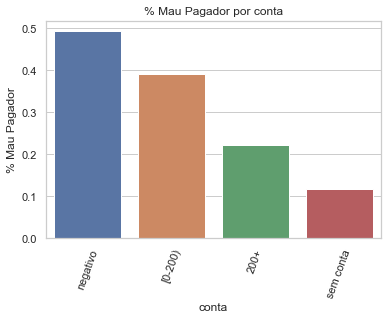

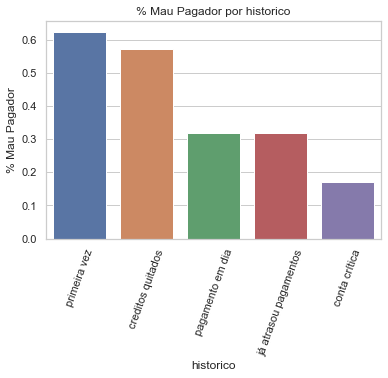

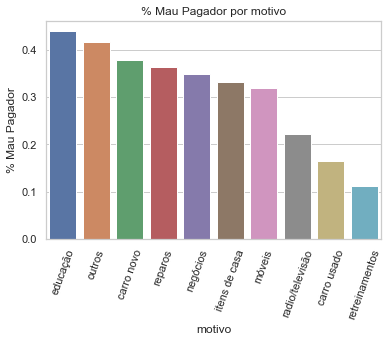

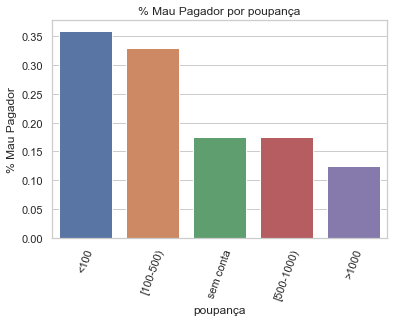

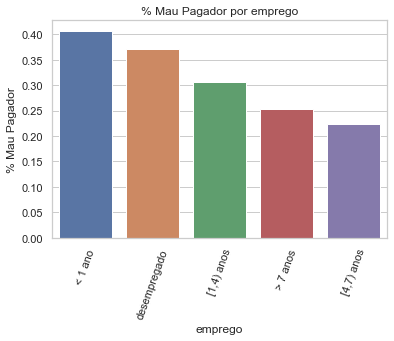

In [12]:
# Setando o tema do gráfico
sns.set_theme(style = 'whitegrid')

# Plotando variáveos categóricas
for coluna in cat_var[0:5]:
    plot = df.groupby(coluna).pagador.mean().sort_values(ascending = False).reset_index()
    x = plot[coluna]
    y = plot['pagador']
    sns.barplot(x=x, y=y, data=plot, hue = coluna, dodge = False).legend_.remove()
    plt.title('% Mau Pagador por ' + coluna)
    plt.ylabel('% Mau Pagador')
    plt.xticks(rotation = 70)
    plt.show()

**Principais Insights gerados das 5 primeiras variáveis:**
- Conta: Clientes com a conta negativa ou com um baixo valor em conta, apresentam maior percentual de mau pagadores. Os maus pagadores, no caso com conta negativa, chegam a representar quase 50% dos casos.
- Histórico: Clientes que nunca pediram crédito ou que já tem créditos quitados, são os que tem mais casos de maus pagadores.
- Motivos: Aqui uma observação interessante, o motivo de crédito que mais possui maus pagadores é o de educação, seguido por outros e carro novo.
- Poupança: Clientes com pouco dinheiro na poupança, apresentam maior porcentagem de maus pagadores. O que está coerente, porque pessoas com dinheiro na poupança tem uma reserva caso não surga alguma emergência.
- Emprego: Clientes com menor tempo de emprego, apresentam maior porcentagem de maus pagadores. O que faz sentido, porque muitas das vezes, pessoas com menor tempo de emprego tem menor estabilidade.

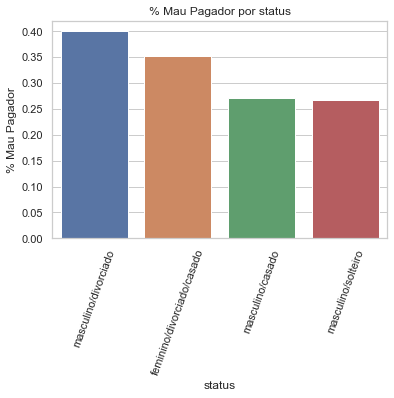

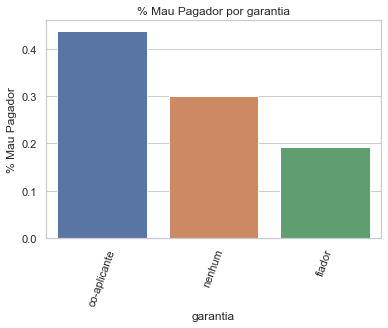

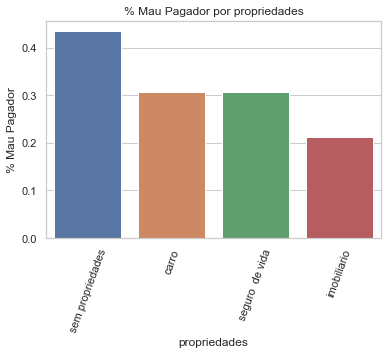

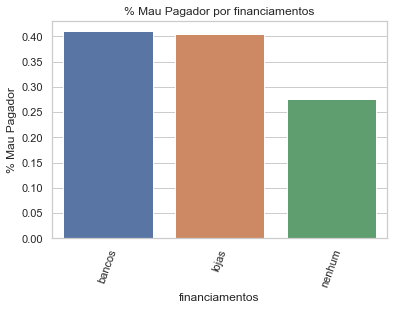

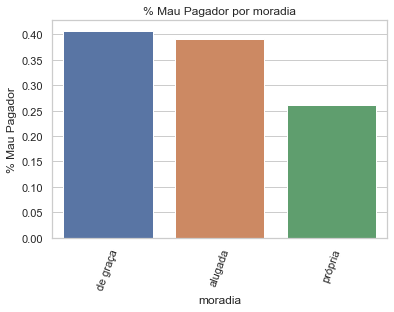

In [13]:
# Setando o tema do gráfico
sns.set_theme(style = 'whitegrid')

# Plotando variáveos categóricas
for coluna in cat_var[5:10]:
    plot = df.groupby(coluna).pagador.mean().sort_values(ascending = False).reset_index()
    x = plot[coluna]
    y = plot['pagador']
    sns.barplot(x=x, y=y, data=plot, hue = coluna, dodge = False).legend_.remove()
    plt.title('% Mau Pagador por ' + coluna)
    plt.ylabel('% Mau Pagador')
    plt.xticks(rotation = 70)
    plt.show()

**Principais Insights dos últimos 5 gráficos**:
- Status: Pessoas do sexo masculino e feminino divorciadas, têm maior quantidade de maus pagadores.
- Garantia: Pessoas com condição de co-aplicante tem maior porcentagem de maus pagadores.
- Propriedades: Pessoas que não possuem nenhum tipo de propriedades têm maior porcentagem de maus pagadores. O que faz sentido, porque pessoas com propriedades (carros, casas, etc) provavelmente tem menos gastos do que uma pessoa que tem que pagar aluguel de casa, prestação de carro, etc.
- Financiamentos: Clientes com financiamentos, seja em loja ou banco, tem maior porcentagem de maus pagadores do que não tem nenhum tipo de financiamento, o que é coerente.
- Moradia: Clientes que moram de graça ou de aluguel, tem maior taxa de maus pagadores do que tem casa própria.

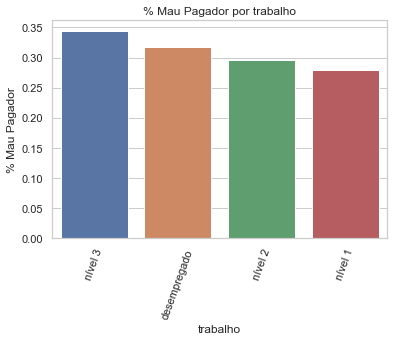

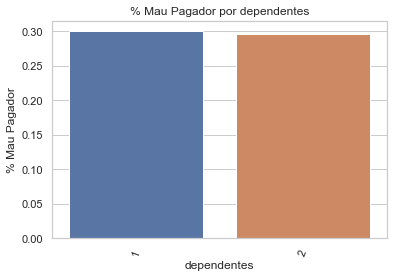

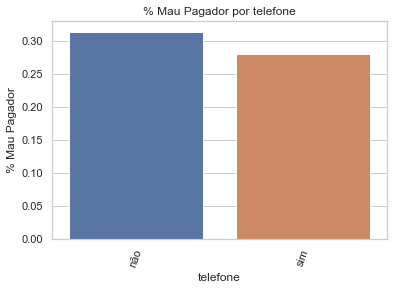

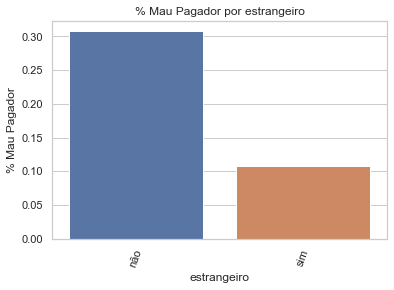

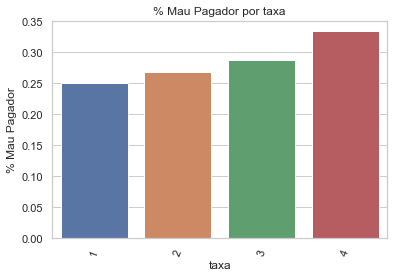

In [14]:
# Setando o tema do gráfico
sns.set_theme(style = 'whitegrid')

# Plotando variáveos categóricas
for coluna in cat_var[10:15]:
    plot = df.groupby(coluna).pagador.mean().sort_values(ascending = False).reset_index()
    x = plot[coluna]
    y = plot['pagador']
    sns.barplot(x=x, y=y, data=plot, hue = coluna, dodge = False).legend_.remove()
    plt.title('% Mau Pagador por ' + coluna)
    plt.ylabel('% Mau Pagador')
    plt.xticks(rotation = 70)
    plt.show()

**Principais Insights dos últimos gráficos:**
- Emprego: Profissionais altamente qualificados, possuem maior taxa de maus pagadores, chegando a 35%. O que é um pouco inesperado, pois esses profissionais tem maior renda.
- Dependentes: Praticamente não tem nenhuma diferença, para clientes com e sem depedente. Essa variável poderá ser retirada no treinamento do modelo.
- Telefone: Cliente que não possuem telefones registrados nos seus nomes, tem uma taxa de maus pagadores um pouco maior do que quem possui registro de telefone.
- Estrangeiro: Clientes que não são estrangeiros tem uma taxa 3 vezes maiores de maus pagadores do que clientes estrangeiros.
- Taxa: Clientes com uma taxa maior de parcelamento em relação a sua renda, apresentam maior porcentagem de maus pagadores, o que faz sentido.

### Analisando variáveis numéricas

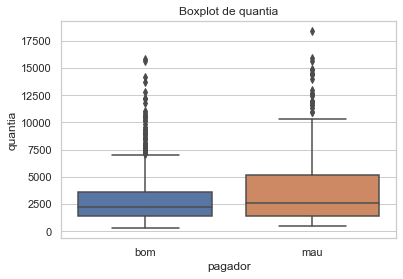

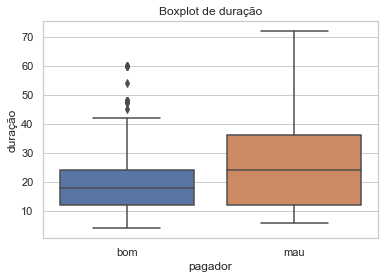

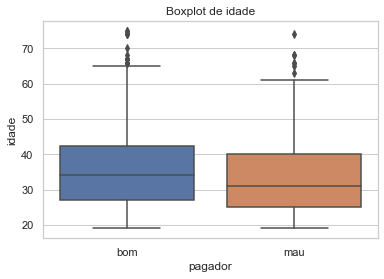

In [15]:
# Setando o tema do gráfico
sns.set_theme(style = 'whitegrid')

# Plotando variáveos numéricas
for coluna in num_var:
    x = dados['pagador']
    y = dados[coluna]
    sns.boxplot(x=x, y=y)
    plt.title('Boxplot de ' + coluna)
    plt.ylabel(coluna)
    plt.show()

**Insights de variáveis numéricas:**
- Quantia: Clientes que são maus pagagadores, tem uma quantia média de crédito maior do que clientes que são bons pagadores.
- Duração: Pessoas que são maus pagaadores, tem uma duração média de crédito maior do que os bons pagadores.
- Idade: Clientes que são maus pagadores, tem uma idade média menor do que os bons pagadores.

### Análise da Variável Target

Text(0.5, 1.0, 'Porcentagem de bons/maus pagadores')

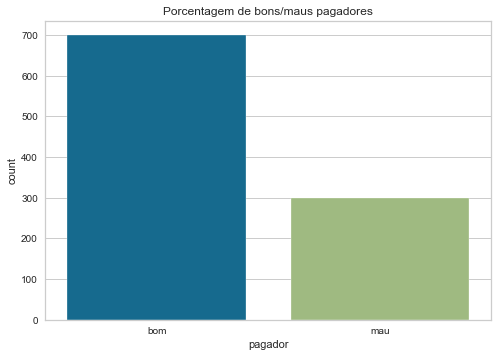

In [145]:
# Plotando a variável pagador
sns.countplot(dados.pagador)
plt.title('Porcentagem de bons/maus pagadores')

Quanto a classificação de clientes, como bons ou maus pagadores, tem-se que 70% dos clientes são bons pagadores e 30 % não são. Esse é um bom indicativo para a empresa, pois temos mais bons pagadores do que maus. Agora o objetivo é aumentar ainda mais essa quantidade de bons pagadores.

# Modelagem com Pycaret


Para a parte de modelagem, será utilizada a biblioteca Pycaret, que possui vários modelos de classificação, além de fornecer técnicas de Machine Learning que facilitarão o trabalho, como normalização das variáveis numéricas, codificação de variáveis categóricas, redução de dimensionalidade com PCA, balanceamento de classes, otimização de hiper-parâmetros de modelo, entre outros.

Após a identificação dos possíveis melhores modelos, vou escolher 2 melhores baseados em f1-score e acurácia para poder otimizá-los e fazer as previsões em dados de treino. O modelo que apresentar melhor performance nos dados de teste, será escolhido como modelo.

In [17]:
# Criando um conjunto de dados para o modelo
df.head()

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,...,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
0,negativo,6,conta crítica,radio/televisão,1169,sem conta,> 7 anos,4,masculino/solteiro,nenhum,...,imobiliario,67,nenhum,própria,2,nível 2,1,sim,não,0
1,[0-200),48,pagamento em dia,radio/televisão,5951,<100,"[1,4) anos",2,feminino/divorciado/casado,nenhum,...,imobiliario,22,nenhum,própria,1,nível 2,1,não,não,1
2,sem conta,12,conta crítica,educação,2096,<100,"[4,7) anos",2,masculino/solteiro,nenhum,...,imobiliario,49,nenhum,própria,1,nível 1,2,não,não,0
3,negativo,42,pagamento em dia,móveis,7882,<100,"[4,7) anos",2,masculino/solteiro,fiador,...,seguro de vida,45,nenhum,de graça,1,nível 2,2,não,não,0
4,negativo,24,já atrasou pagamentos,carro novo,4870,<100,"[1,4) anos",3,masculino/solteiro,nenhum,...,sem propriedades,53,nenhum,de graça,2,nível 2,2,não,não,1


In [18]:
# Importando os módulos necessários para treinamento de modelo
from pycaret.classification import setup, models, create_model, compare_models, tune_model, predict_model, plot_model, predict_model, evaluate_model, finalize_model, save_model

In [19]:
# Configuração da Modelagem automática feita pelo PyCaret
# Envolve os procedimentos de validação quanto de pré-processamento
modelagem = setup(data = df,
                  target = 'pagador',
                  train_size = 0.75,
                  normalize = True,
                  categorical_features = ['conta', 
                                          'historico',
                                          'motivo', 
                                          'taxa', 
                                          'poupança', 
                                          'emprego',
                                          'status',      
                                          'garantia',  
                                          'propriedades',  
                                          'financiamentos',  
                                          'moradia',
                                          'estrangeiro',
                                          'telefone', 
                                          #'dependentes'
                                         ],
                  
                  numeric_features = ['quantia',  
                                      'duração', 
                                      'idade'
                                      ]
                 ) 

,Description,Value
0,session_id,3106
1,Target,pagador
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
# Lista de modelos para avaliação
model_list = ['rf', 'gbc', 'et', 'lr',  'lda', 'knn']

In [21]:
# Treinamento dos modelos e obtendo o 'melhor modelo'
best = compare_models(model_list)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7587,0.7913,0.3613,0.7130,0.4631,0.3313,0.3692,0.7860
gbc,Gradient Boosting Classifier,0.7533,0.7639,0.4609,0.6225,0.5244,0.3645,0.3747,0.2040
ada,Ada Boost Classifier,0.7467,0.7579,0.4919,0.5993,0.5367,0.3653,0.3710,0.1340
lr,Logistic Regression,0.7467,0.7730,0.4642,0.6040,0.5206,0.3534,0.3613,0.0500
lda,Linear Discriminant Analysis,0.7467,0.7679,0.4868,0.6042,0.5328,0.3629,0.3704,0.0480
et,Extra Trees Classifier,0.7387,0.7587,0.3875,0.5995,0.4576,0.3013,0.3180,0.2800
knn,K Neighbors Classifier,0.7107,0.7155,0.2994,0.5377,0.3740,0.2093,0.2279,0.0430


Com uma análise preliminar dos modelos, escolherei 2 modelos modelos para otimizar. Serão os modelos de RandomForest que apresentou a melhor performance, e o modelo de regressão logística que também é um bom modelo de classificação.

In [22]:
# Criando o modelo de regressão logística
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7200,0.7074,0.4783,0.5500,0.5116,0.3167,0.3182
1,0.8133,0.8712,0.5652,0.7647,0.6500,0.5266,0.5378
2,0.6933,0.7207,0.4348,0.5000,0.4651,0.2516,0.2528
3,0.7200,0.7651,0.3913,0.5625,0.4615,0.2805,0.2889
4,0.7200,0.7839,0.5455,0.5217,0.5333,0.3335,0.3336
5,0.7467,0.7616,0.3182,0.6364,0.4242,0.2843,0.3124
6,0.7333,0.7350,0.3636,0.5714,0.4444,0.2802,0.2926
7,0.7867,0.8336,0.5000,0.6875,0.5789,0.4408,0.4508
8,0.7867,0.8027,0.5455,0.6667,0.6000,0.4565,0.4608
9,0.7467,0.7487,0.5000,0.5789,0.5366,0.3636,0.3654


**Otimização por f1-score:**

A métrica que será utilizada para otimização do modelo, será o f1-score. A escolha de otimizar esta métrica, é porque o f1-score retorna uma média harmônica entre a precisão e o recall.

- Precisão: o número de vezes que a classe foi predita corretamente, sobre o número de vezes que a classe foi predita.

                           P_positive = TP / (TP + FP) ou P_negative = TN / (TN + FN)

- Recall: o número de vezes que a classe foi predita corretamente, sobre a quantidade de observações no conjunto de dados.

                           R_positive = TP / (TP + FN) ou P_negative = TN / (TN + FP) 
                           
- F1-Score:
                           
                           F1 = 2 * (P * R) / (P + R)

In [23]:
# Otimizando o modelo de regressão logística
lr = tune_model(lr, optimize = 'F1', n_iter = 15)
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6533,0.6940,0.6522,0.4545,0.5357,0.2729,0.2843
1,0.7467,0.8562,0.7826,0.5625,0.6545,0.4629,0.4786
2,0.6533,0.7140,0.6522,0.4545,0.5357,0.2729,0.2843
3,0.6800,0.7617,0.6522,0.4839,0.5556,0.3140,0.3226
4,0.6800,0.7813,0.7727,0.4722,0.5862,0.3492,0.3775
5,0.7333,0.7684,0.4545,0.5556,0.5000,0.3207,0.3237
6,0.7067,0.7384,0.6818,0.5000,0.5769,0.3605,0.3706
7,0.7467,0.8319,0.7273,0.5517,0.6275,0.4410,0.4506
8,0.7200,0.8105,0.6818,0.5172,0.5882,0.3821,0.3905
9,0.6533,0.7590,0.6818,0.4412,0.5357,0.2788,0.2957


LogisticRegression(C=0.84, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3106, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Previsões do Modelo Regressão Logística
pred_lr = predict_model(lr)
pred_lr

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7440,0.8092,0.7632,0.5577,0.6444,0.4519,0.4655


,duração,quantia,idade,conta_200+,conta_0-200),conta_negativo,conta_sem conta,historico_conta crítica,historico_creditos quitados,historico_já atrasou pagamentos,...,trabalho_desempregado,trabalho_nível 1,trabalho_nível 2,trabalho_nível 3,dependentes_1,telefone_não,estrangeiro_não,pagador,Label,Score
0,0.243520,-0.592566,1.655731,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0.6966
1,-0.905158,-0.394466,-1.154793,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.8281
2,0.243520,-0.808347,-0.973469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.8311
3,-0.741061,-0.814120,-1.517441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,0,0.7176
4,-0.002626,-0.114095,-0.701482,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,0.5107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.243520,-0.426220,-0.248172,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0.6379
246,0.243520,0.925479,-0.792144,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.9646
247,-0.494916,-0.620350,2.471689,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.9621
248,-0.741061,0.518093,-1.426779,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.9197


**Modelo Random Forest**

In [28]:
# Criando o modelo de Random Forest
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7200,0.7533,0.1739,0.6667,0.2759,0.1706,0.2302
1,0.7600,0.8194,0.5217,0.6316,0.5714,0.4069,0.4104
2,0.7733,0.7701,0.3913,0.7500,0.5143,0.3849,0.4196
3,0.7867,0.7538,0.4348,0.7692,0.5556,0.4291,0.4593
4,0.7067,0.7487,0.3636,0.5000,0.4211,0.2311,0.2364
5,0.7600,0.8323,0.1818,1.0000,0.3077,0.2390,0.3684
6,0.7600,0.7633,0.4091,0.6429,0.5000,0.3522,0.3678
7,0.7867,0.8336,0.3636,0.8000,0.5000,0.3878,0.4365
8,0.7600,0.8276,0.4091,0.6429,0.5000,0.3522,0.3678
9,0.7733,0.8109,0.3636,0.7273,0.4848,0.3596,0.3951


In [29]:
# Otimização do modelo de Random Forest
rf = tune_model(rf, optimize = 'F1', n_iter = 15)
rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7067,0.7575,0.6087,0.5185,0.5600,0.3421,0.3446
1,0.7600,0.8286,0.7391,0.5862,0.6538,0.4739,0.4813
2,0.7067,0.7483,0.6087,0.5185,0.5600,0.3421,0.3446
3,0.7333,0.7592,0.6087,0.5600,0.5833,0.3878,0.3885
4,0.6667,0.7204,0.5909,0.4483,0.5098,0.2644,0.2702
5,0.8133,0.8456,0.5455,0.7500,0.6316,0.5107,0.5223
6,0.7067,0.7762,0.6818,0.5000,0.5769,0.3605,0.3706
7,0.7333,0.8070,0.5909,0.5417,0.5652,0.3734,0.3742
8,0.8000,0.8276,0.7273,0.6400,0.6809,0.5361,0.5384
9,0.7867,0.8148,0.6818,0.6250,0.6522,0.4987,0.4997


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=-1, oob_score=False,
                       random_state=3106, verbose=0, warm_start=False)

In [30]:
# Previsão do Modelo de Random Forest
pred_rf = predict_model(rf)
pred_rf

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7320,0.7972,0.7237,0.5446,0.6215,0.4204,0.4306


,duração,quantia,idade,conta_200+,conta_0-200),conta_negativo,conta_sem conta,historico_conta crítica,historico_creditos quitados,historico_já atrasou pagamentos,...,trabalho_desempregado,trabalho_nível 1,trabalho_nível 2,trabalho_nível 3,dependentes_1,telefone_não,estrangeiro_não,pagador,Label,Score
0,0.243520,-0.592566,1.655731,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0.7343
1,-0.905158,-0.394466,-1.154793,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.7650
2,0.243520,-0.808347,-0.973469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.7885
3,-0.741061,-0.814120,-1.517441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,0,0.5445
4,-0.002626,-0.114095,-0.701482,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,0.5023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.243520,-0.426220,-0.248172,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0.7645
246,0.243520,0.925479,-0.792144,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.7961
247,-0.494916,-0.620350,2.471689,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.9146
248,-0.741061,0.518093,-1.426779,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0.7081


Sendo assim, o melhor modelo foi o modelo de regressão logística, que alcançou as métricas mais altas para dados de teste do que os outros modelos avaliados. 

O F1-score para o modelo de regressão logística foi de 0.64 versus 0.62 do random forest, e a acurácia de 0.74 versus 0.73 do random forest. Ou seja, temos uma performance do modelo de regressão logística melhor para este conjunto de dados, e ainda o modelo de regressão logística é mais leve computacionalmente do que o random forest.

### Avaliando o modelo de Regressão Logística

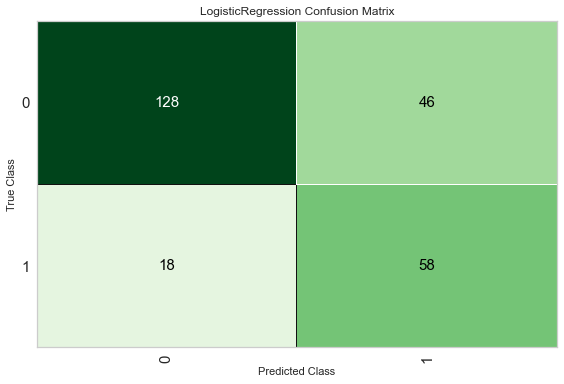

In [65]:
plot_model(lr, 'confusion_matrix')

Avaliando a matriz de confusão, temos que o **modelo conseguiu prever 58/76 = 76,3% dos maus pagadores e 128/174 = 73,5% dos bons pagadores.** Isso é um bom resultado, pois o conjunto de dados estava levemente desbalanceado, o que faz com que para identificar mais ocorrências da classe com menos observações, no caso os maus pagadores, eu preciso sacrificar um pouco da minha acurácia da classe dominante, dos bons pagadores. É uma questão de trade-off.

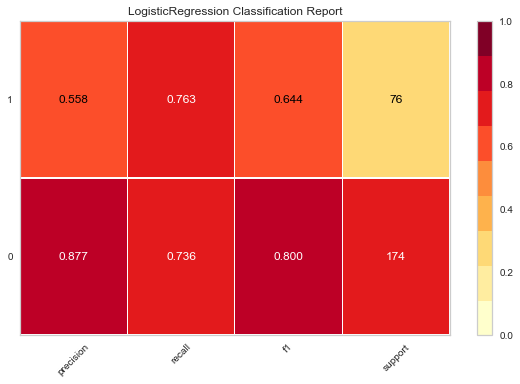

In [144]:
plot_model(lr, 'class_report')

### Avaliação de risco

Voltando no problema a ser resolvido, eu quero classificar o risco de oferecer crédito a clientes. O modelo aplicado retorna uma probabilidade de um cliente pertencer a uma determinada classe, dessa forma vou querer que para cada cliente o modelo retorne a probabilidade de ser bom pagador, baseado nessa probabilidade, o cliente será classificado em um grupo de risco.

Clientes com altas probabilidades de serem bons pagadores serão classificados como riscos baixos, e conforme a probabilidade diminiu, a classificação de risco de crédito do cliente irá piorando.

In [73]:
# Revendo novamente as previsões do modelo
pred_lr.loc[:, ['Label', 'Score']]

,Label,Score
0,0,0.6966
1,0,0.8281
2,0,0.8311
3,0,0.7176
4,0,0.5107
...,...,...
245,0,0.6379
246,0,0.9646
247,0,0.9621
248,0,0.9197


O modelo retorna a probabilidade de o cliente pertencer a cada uma das classes, seja bom ou mau pagador, na coluna Score. Sendo assim, para obter a probabilidade ser um bom pagador de todos os clientes, será necessário subtrair 1 da probabilidade do cliente ser um mau pagador. O que será feito na célula abaixo.

In [79]:
# Criar coluna de probabilidade
pred_lr['prob_bom_pagador'] = np.nan

# Loop para criar a coluna com probabilidades
for obs in range(len(pred_lr['Label'])):
    if pred_lr['Label'][obs] == 1:
        pred_lr['prob_bom_pagador'][obs] = 1 - pred_lr['Score'][obs]
    else:
        pred_lr['prob_bom_pagador'][obs] = pred_lr['Score'][obs]  

In [108]:
# Visualizando a regra acima
previsoes = pred_lr.loc[:, ['pagador','Label', 'prob_bom_pagador']]
previsoes

,pagador,Label,prob_bom_pagador
0,0,0,0.6966
1,0,0,0.8281
2,0,0,0.8311
3,0,0,0.7176
4,0,0,0.5107
...,...,...,...
245,0,0,0.6379
246,0,0,0.9646
247,0,0,0.9621
248,0,0,0.9197


In [118]:
# Avaliando a distribuição da variáveis
previsoes.describe()

,pagador,Label,prob_bom_pagador
count,250.000000,250.000000,250.000000
mean,0.304000,0.416000,0.557183
std,0.460905,0.493882,0.286390
min,0.000000,0.000000,0.024100
25%,0.000000,0.000000,0.300600
50%,0.000000,0.000000,0.601200
75%,1.000000,1.000000,0.822075
max,1.000000,1.000000,0.985500


Para classificar o risco de cada cliente, será utilizado os quartis (25%, 50%, 75%), da seguinte maneira:
- Probabilidade ser bom pagador > 0.82 : Risco baixo
- Probabilidade ser bom pagador > 0.60 e < 0.82 : Risco médio
- Probabilidade ser bom pagador > 0.30 e < 0.60 : Risco alto
- Probabilidade ser bom pagador < 0.30 : Risco muito alto

Classificando os clientes dessa forma, poderiam ser feitas propostas de crédito diferentes para cada grupo, por exemplo, para clientes classificados como risco muito alto, poderia ser oferecido crédito de quantia baixa e com juros mais elevados, para compensar o risco de crédito.

In [135]:
# Aplicando a regra na tabela
# Criar coluna de risco de creditp
pred_lr['risco_credito'] = np.nan

# Loop para criar a coluna com as classes de cada cliente
for obs in range(len(pred_lr['Label'])):
    if pred_lr['prob_bom_pagador'][obs] >= 0.822075:
        pred_lr['risco_credito'][obs] = 'Risco Baixo'
    if pred_lr['prob_bom_pagador'][obs] < 0.822075 and pred_lr['prob_bom_pagador'][obs] >= 0.601200:
        pred_lr['risco_credito'][obs] = 'Risco Médio'
    if pred_lr['prob_bom_pagador'][obs] < 0.601200 and pred_lr['prob_bom_pagador'][obs] >= 0.300600:
        pred_lr['risco_credito'][obs] = 'Risco Alto'
    if pred_lr['prob_bom_pagador'][obs] < 0.300600:
        pred_lr['risco_credito'][obs] = 'Risco Muito Alto'

In [138]:
# Salvando os dados em previsões finais
previsoes_finais = pred_lr.loc[:, ['Label', 'risco_credito']]
previsoes_finais

,Label,risco_credito
0,0,Risco Médio
1,0,Risco Baixo
2,0,Risco Baixo
3,0,Risco Médio
4,0,Risco Alto
...,...,...
245,0,Risco Médio
246,0,Risco Baixo
247,0,Risco Baixo
248,0,Risco Baixo


In [149]:
previsoes_finais.risco_credito.value_counts()

Risco Baixo         63
Risco Muito Alto    63
Risco Alto          62
Risco Médio         62
Name: risco_credito, dtype: int64

### Salvando o modelo em disco

In [146]:
# Finalizando o modelo
lr_final = finalize_model(lr)

In [147]:
# Salvando o mdelo
save_model(lr, 'lr_credit_score')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['conta',
                                                             'historico',
                                                             'motivo', 'taxa',
                                                             'poupança',
                                                             'emprego', 'status',
                                                             'garantia',
                                                             'propriedades',
                                                             'financiamentos',
                                                             'moradia',
                                                             'estrangeiro',
                                                             'telefone'],
                                       display_types=True, features_todrop=[],
                                       id

### Conclusão

Com este projeto, foi possível obter uma solução na classificação de clientes para oferecer crédito, podendo classificá-los de acordo com seu score de crédito. Uma empresa com esse tipo de solução, pode pensar em diferentes alternativas para contornar clientes com risco de crédito muito alto, como oferecer condições mais caras para adquirir os produtos, ou colocar algum bem como garantia, por exemplo.

Em relação ao modelo, foi possível testar vários modelo, com o artifício do AutoML oferecido pela biblioteca Pycaret, e obter um modelo com um bom aproveitamento. O AutoML oferece ao cientista de dados uma boa ferramenta para testar diferentes modelos e diferentes técnicas de forma a otimizar o trabalho.

O melhor modelo que foi obtido foi o de regressão logística, que conseguiu acertar 76% dos casos com maus pagadores. O que já poderia agregar bastante na tomada de decisão de uma empresa que oferece crédito.

**Fim!**